<a href="https://colab.research.google.com/github/nikhilcn-ec/Machine_learning/blob/main/Copy_of_multilinear_reg_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
df_start = pd.read_csv('/content/student-mat.csv',sep=";")
df_start.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
df_start.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


<ipython-input-6-f68a0e23c253>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_start['G3'], kde=True)


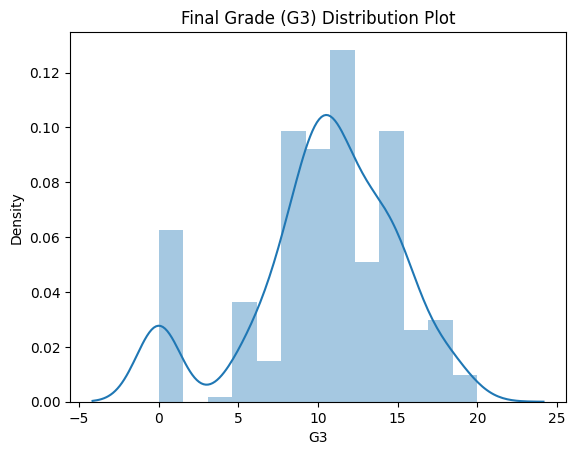

In [ ]:
plt.title('Final Grade (G3) Distribution Plot')
sns.distplot(df_start['G3'], kde=True)
plt.show()

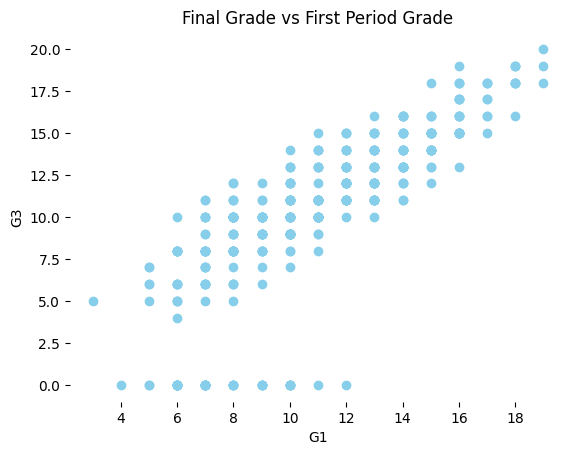

In [ ]:
plt.scatter(df_start['G1'], df_start['G3'], color='skyblue')
plt.title('Final Grade vs First Period Grade')
plt.xlabel('G1')
plt.ylabel('G3')
plt.box(False)
plt.show()


In [ ]:
# Set dependent and independent variables
X = df_start.drop('G3', axis=1).values  # All features except final grade
y = df_start['G3'].values               # Final grade is the target


In [ ]:
# Detect categorical columns (manually from dataset head or by checking dtype == 'object')
categorical_columns = df_start.drop('G3', axis=1).select_dtypes(include=['object']).columns.tolist()

# Get indices of those categorical columns
cat_indices = [df_start.columns.get_loc(col) for col in categorical_columns]

# One-hot encoding using ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), cat_indices)],
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred = np.clip(y_pred, 0, 20)

In [ ]:
np.set_printoptions(precision = 2)
result = np.concatenate((y_pred.reshape(len(y_pred), 1),
y_test.reshape(len(y_test), 1)), 1)
result

array([[14.19, 14.  ],
       [10.73, 10.  ],
       [ 9.4 ,  9.  ],
       [15.55, 15.  ],
       [16.56, 16.  ],
       [11.74, 12.  ],
       [13.27, 14.  ],
       [10.31, 11.  ],
       [ 8.15,  9.  ],
       [13.59, 15.  ],
       [ 7.11, 10.  ],
       [15.8 , 11.  ],
       [11.33, 10.  ],
       [ 8.96,  8.  ],
       [15.09, 15.  ],
       [14.89, 14.  ],
       [12.91, 12.  ],
       [ 8.04,  0.  ],
       [ 9.06, 10.  ],
       [14.5 , 16.  ],
       [ 6.36,  0.  ],
       [ 2.56,  0.  ],
       [ 5.95,  8.  ],
       [14.67, 16.  ],
       [11.55, 12.  ],
       [15.53, 15.  ],
       [ 9.25, 10.  ],
       [20.  , 19.  ],
       [ 0.  ,  0.  ],
       [13.24, 14.  ],
       [ 0.  ,  0.  ],
       [ 6.42, 10.  ],
       [ 7.52,  8.  ],
       [ 5.35,  4.  ],
       [12.65, 13.  ],
       [10.65, 10.  ],
       [13.46, 13.  ],
       [18.57, 18.  ],
       [ 8.63,  8.  ],
       [11.52, 11.  ],
       [ 4.21,  6.  ],
       [19.06, 18.  ],
       [ 7.08,  8.  ],
       [ 7.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.5394455165787675
MSE: 5.6712230290832775
R² Score: 0.7944378452770399
